In [218]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats
from statsmodels.formula.api import logit
from statsmodels.api import Logit
from sklearn.preprocessing import LabelEncoder

### Configuration
Configure the notebooks to make a better look and feel which assists to do the analysis in easy ways.

In [219]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
pd.set_option('display.max_columns', 100)

In [220]:
df = pd.read_excel("data2.xlsx", index_col='Serial_no')
df = df.loc[:, df.columns != 'Q_1']
df = df.drop(columns=['Q_14', 'Q_15'])
df.head(3)

,Q_2,Q_3,Q_4,Q_5,Q_6,Q_7,Drop_out,Q_8,Q_9,Q_10,Q_11,Q_12,Q_13,Q_16,Q_17,Q_18,Q_19,Q_20,Q_21,Q_22,Q_23,Q_24,Q_25,Q_26,Q_27,Q_28,Q_29,Q_30,Q_31,Q_32,Q_33,Q_34,Q_35_i,Q_35_ii,Q_35_iii,Q_35_iv,Q_35_v,Q_35_vi,Q_36,Q_37_i,Q_37_ii,Q_37_iii,Q_37_iv,Q_37_v,Q_37_vi,Q_37_vii,Q_37_viii,Q_37_ix,Q_37_x,Q_37_xi,Q_37_xii,Q_37_xiii,Q_37_xiv,Q_37_xv
Serial_no,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,2,27,8,150000,3.0,0,1,1,1,1,1,2,2,2,2,7,6,2,1,2,2,2,2,1,1,2,3,2,1,1,3,2,1,2,2,2,2,2,1,1,1,1,5,1,1,1,1,1,1,1,1,1,1,5
2,2,26,10,115000,0.0,0,1,1,3,3,1,2,2,1,3,8,7,2,2,2,2,1,1,2,1,1,3,2,1,1,3,1,2,2,2,2,2,1,1,1,1,1,3,2,2,1,1,1,2,2,2,5,5,4
3,2,26,6,120000,3.0,2,1,1,3,3,2,2,2,2,2,4,4,2,1,2,2,1,1,1,2,2,3,2,2,3,3,1,2,2,2,2,2,1,1,1,1,2,2,2,1,2,1,1,1,1,1,5,5,3


In [221]:
categorical_d = ['Q_2', 'Q_7', 'Q_8', 'Q_9', 'Q_10', 'Q_11', 'Q_12', 'Q_13', 'Q_16', 'Q_17', 'Q_20', 'Q_21', 'Q_22', 'Q_23', 'Q_24', 'Q_25', 'Q_26', 'Q_27', 'Q_28', 'Q_29', 'Q_30', 'Q_31', 'Q_32', 'Q_33', 'Q_34', 'Q_35_i', 'Q_35_ii', 'Q_35_iii', 'Q_35_iv', 'Q_35_v', 'Q_35_vi', 'Q_36', 'Q_37_i', 'Q_37_ii', 'Q_37_iii', 'Q_37_iv', 'Q_37_v', 'Q_37_vi', 'Q_37_vii', 'Q_37_viii', 'Q_37_ix', 'Q_37_x', 'Q_37_xi', 'Q_37_xii', 'Q_37_xiii', 'Q_37_xiv', 'Q_37_xv']

numerical_d = ['Q_3', 'Q_4', 'Q_5', 'Q_18', 'Q_19']

df[categorical_d].head(2)

,Q_2,Q_7,Q_8,Q_9,Q_10,Q_11,Q_12,Q_13,Q_16,Q_17,Q_20,Q_21,Q_22,Q_23,Q_24,Q_25,Q_26,Q_27,Q_28,Q_29,Q_30,Q_31,Q_32,Q_33,Q_34,Q_35_i,Q_35_ii,Q_35_iii,Q_35_iv,Q_35_v,Q_35_vi,Q_36,Q_37_i,Q_37_ii,Q_37_iii,Q_37_iv,Q_37_v,Q_37_vi,Q_37_vii,Q_37_viii,Q_37_ix,Q_37_x,Q_37_xi,Q_37_xii,Q_37_xiii,Q_37_xiv,Q_37_xv
Serial_no,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,2,0,1,1,1,1,2,2,2,2,2,1,2,2,2,2,1,1,2,3,2,1,1,3,2,1,2,2,2,2,2,1,1,1,1,5,1,1,1,1,1,1,1,1,1,1,5
2,2,0,1,3,3,1,2,2,1,3,2,2,2,2,1,1,2,1,1,3,2,1,1,3,1,2,2,2,2,2,1,1,1,1,1,3,2,2,1,1,1,2,2,2,5,5,4


In [222]:
for i in categorical_d:
    print(pd.crosstab(index=df[i], columns=df['Drop_out']))
    print("------------------")

Drop_out   0   1
Q_2             
1         37  98
2         29  46
------------------
Drop_out   0    1
Q_7              
0          0    3
2         66  141
------------------
Drop_out   0   1
Q_8             
1         24  93
2         17  44
3         25   7
------------------
Drop_out   0   1
Q_9             
1          5  41
2          9  18
3         52  85
------------------
Drop_out   0   1
Q_10            
1          2  16
2         11  73
3         53  55
------------------
Drop_out   0    1
Q_11             
1         36  117
2         30   27
------------------
Drop_out   0   1
Q_12            
1          0  53
2          0  91
3         66   0
------------------
Drop_out   0   1
Q_13            
1          4  37
2         32  79
3         30  28
------------------
Drop_out   0    1
Q_16             
1         39   29
2         27  113
22         0    2
------------------
Drop_out   0   1
Q_17            
1          1  31
2         20  65
3         45  48
-----------------

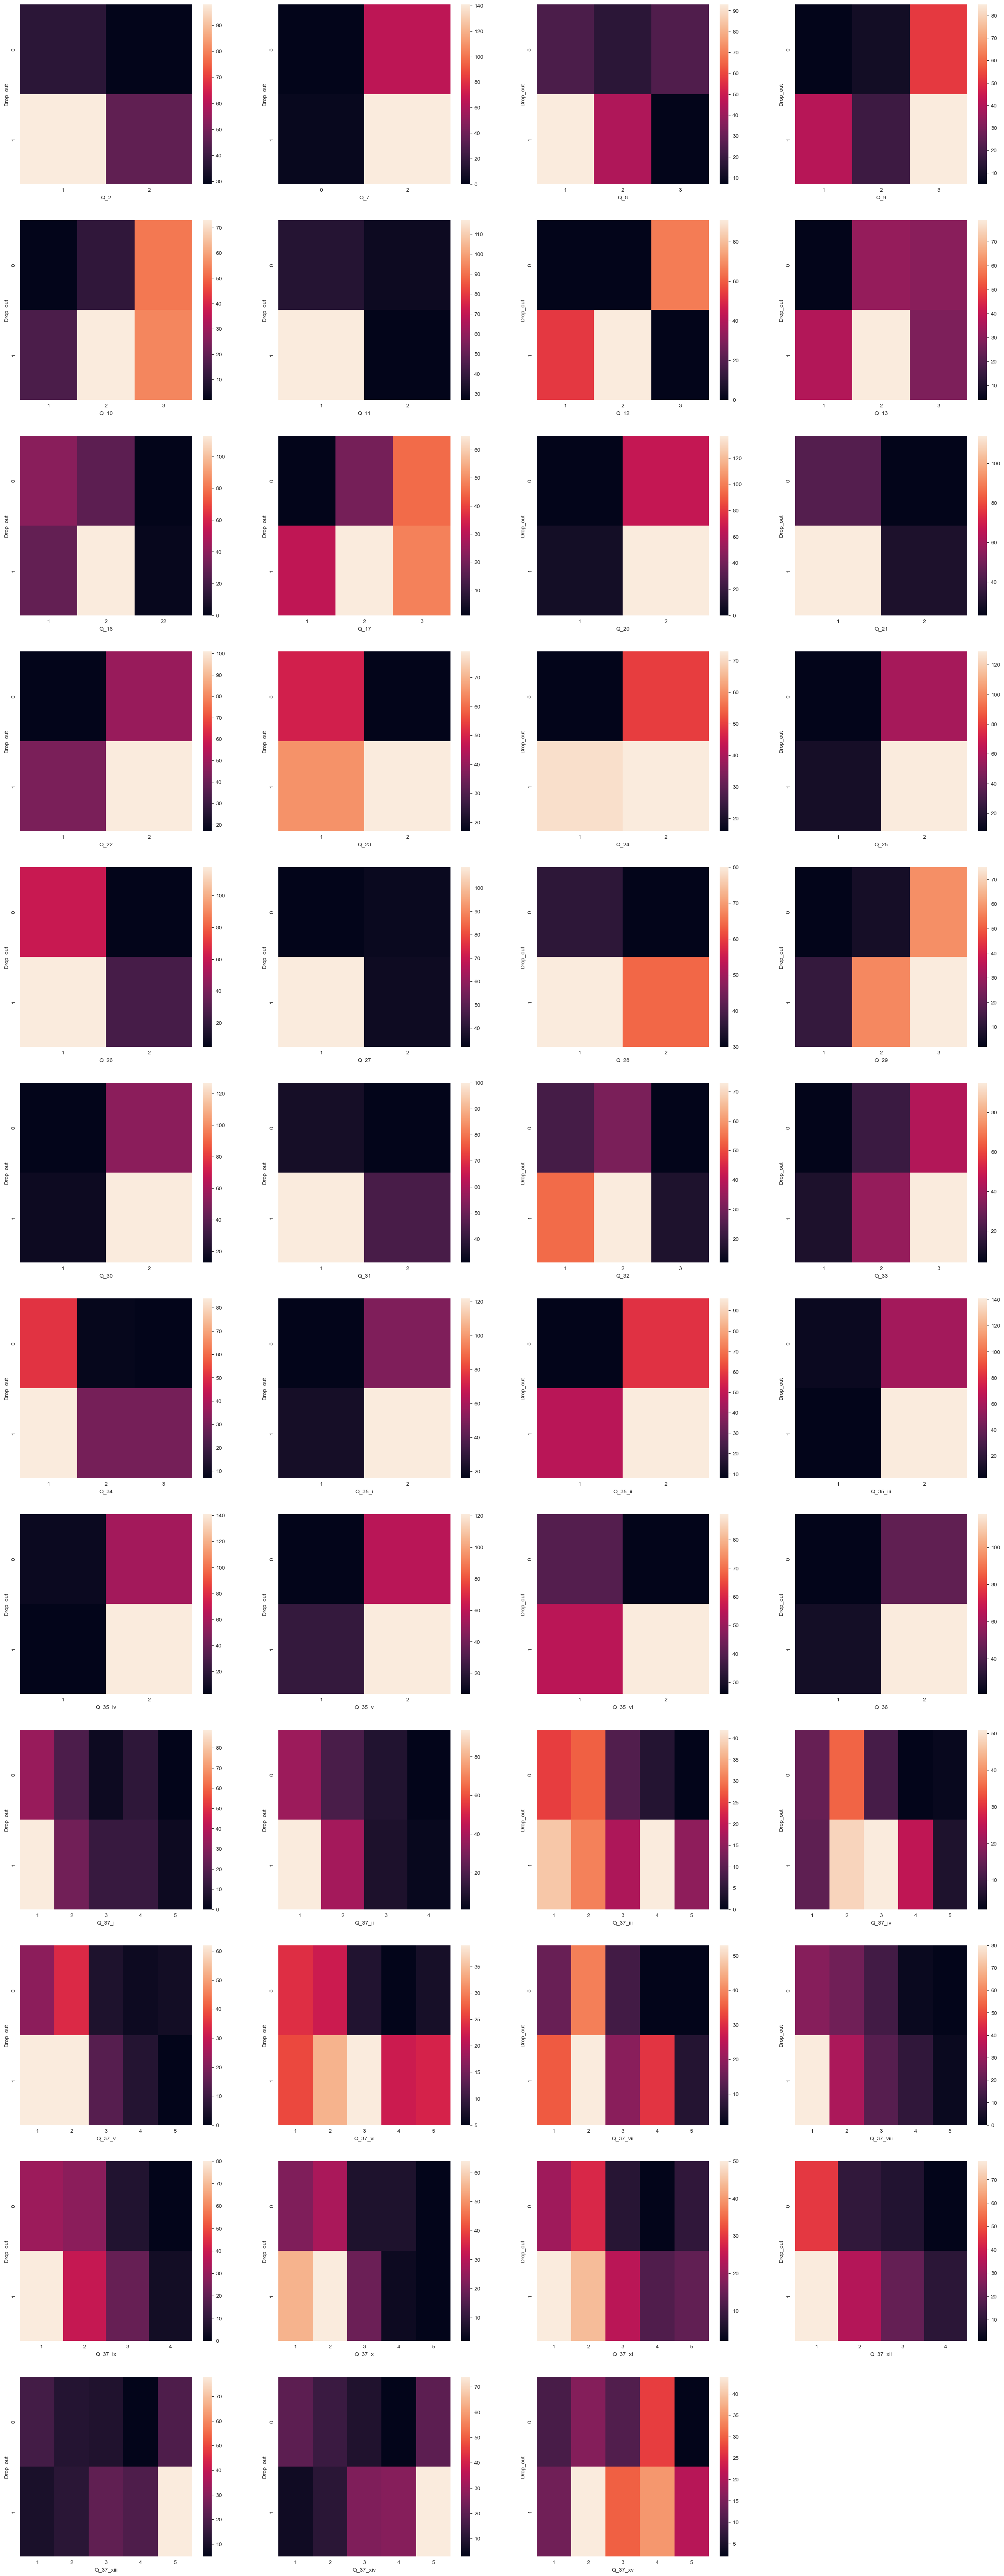

In [223]:
fig = plt.figure(figsize=(32, 90))
k = 1
for i in categorical_d:
    plt.subplot(13, 4, k)
    crs = pd.crosstab(index=df['Drop_out'], columns=df[i])
    # sns.barplot(crs)
    sns.heatmap(crs)
    k += 1

plt.show()

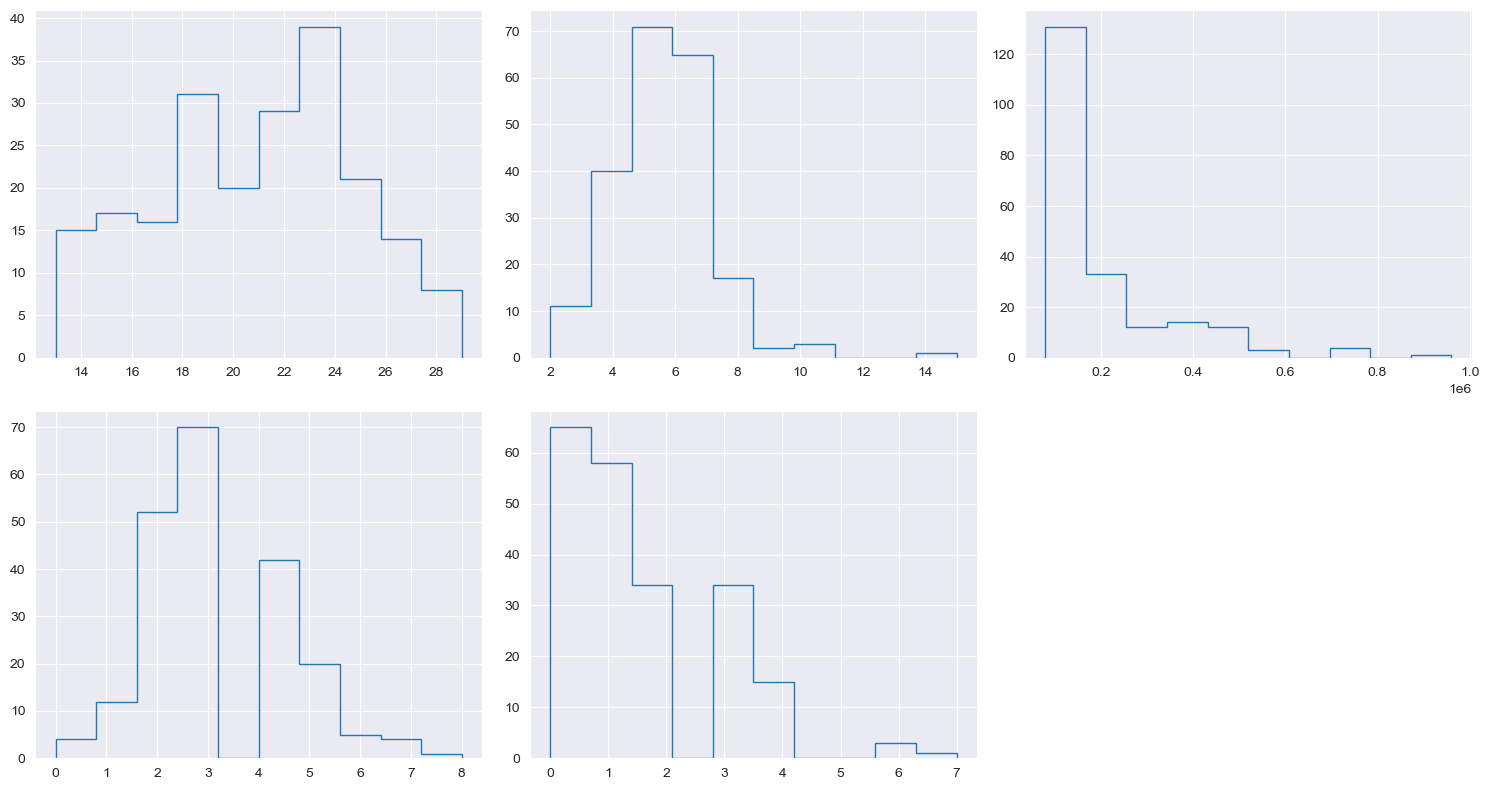

In [224]:
fig = plt.figure(figsize=(15, 8))
k = 1
for i in numerical_d:
    plt.subplot(2, 3, k)
    plt.hist(df[i], label=df[i], histtype='step')
    k += 1

plt.tight_layout()
plt.show()

In [225]:
import plotly.graph_objects as go
import numpy as np

nc = df[numerical_d].corr()
fig = go.Figure()
fig.add_trace(
    go.Heatmap(
        x = nc.columns,
        y = nc.index,
        z = np.array(nc),
        text=nc.values,
        texttemplate='%{text:.2f}'
    )
)
fig.show()

In [226]:
sig_factors = []

In [227]:
for i in numerical_d:
    p_val = stats.kstest(df[i], 'norm').pvalue
    if p_val<0.05:
        sig_factors.append(i)

for i in categorical_d:
    crs = pd.crosstab(index=df['Drop_out'], columns=df[i])
    stat, p, dof = stats.chi2_contingency(crs.values)[0:3]
    if p<0.05:
        sig_factors.append(i)

In [228]:
print("Significant variables")
print(sig_factors)

Significant variables
['Q_3', 'Q_4', 'Q_5', 'Q_18', 'Q_19', 'Q_8', 'Q_9', 'Q_10', 'Q_11', 'Q_12', 'Q_13', 'Q_16', 'Q_17', 'Q_21', 'Q_23', 'Q_24', 'Q_27', 'Q_29', 'Q_31', 'Q_34', 'Q_35_ii', 'Q_35_iii', 'Q_35_iv', 'Q_35_vi', 'Q_36', 'Q_37_iii', 'Q_37_iv', 'Q_37_vi', 'Q_37_vii', 'Q_37_xiii', 'Q_37_xiv', 'Q_37_xv']


In [229]:
sig_factors.append('Drop_out')
data = df[sig_factors]
data

,Q_3,Q_4,Q_5,Q_18,Q_19,Q_8,Q_9,Q_10,Q_11,Q_12,Q_13,Q_16,Q_17,Q_21,Q_23,Q_24,Q_27,Q_29,Q_31,Q_34,Q_35_ii,Q_35_iii,Q_35_iv,Q_35_vi,Q_36,Q_37_iii,Q_37_iv,Q_37_vi,Q_37_vii,Q_37_xiii,Q_37_xiv,Q_37_xv,Drop_out
Serial_no,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,27,8,150000,7,6,1,1,1,1,2,2,2,2,1,2,2,1,3,1,2,2,2,2,2,1,1,5,1,1,1,1,5,1
2,26,10,115000,8,7,1,3,3,1,2,2,1,3,2,2,1,1,3,1,1,2,2,2,1,1,1,3,2,1,5,5,4,1
3,26,6,120000,4,4,1,3,3,2,2,2,2,2,1,2,1,2,3,2,1,2,2,2,1,1,2,2,1,2,5,5,3,1
4,15,7,150000,3,2,2,3,3,2,2,3,2,1,1,1,1,2,3,2,1,2,2,2,1,1,1,5,1,5,5,5,1,1
5,20,5,90000,3,2,1,3,3,2,2,2,2,3,1,1,1,2,3,2,1,2,2,2,1,1,1,1,1,1,5,5,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,21,5,200000,3,0,3,3,3,1,3,3,1,3,2,1,2,1,3,2,1,2,2,2,1,1,1,1,5,1,5,5,1,0
340,21,3,200000,1,0,3,3,3,2,3,3,1,3,2,1,2,2,3,2,1,2,2,2,1,1,1,1,5,1,5,5,1,0
341,21,4,210000,2,0,3,3,3,1,3,3,1,3,2,1,2,2,3,2,1,2,2,2,1,1,1,1,5,1,5,5,1,0


In [230]:
data['Drop_out'].value_counts()

1    144
0     66
Name: Drop_out, dtype: int64

In [231]:
fs = "Drop_out ~ "
for l in sig_factors[:-1]:
    fs = fs + ' + ' + l
print(fs)

Drop_out ~  + Q_3 + Q_4 + Q_5 + Q_18 + Q_19 + Q_8 + Q_9 + Q_10 + Q_11 + Q_12 + Q_13 + Q_16 + Q_17 + Q_21 + Q_23 + Q_24 + Q_27 + Q_29 + Q_31 + Q_34 + Q_35_ii + Q_35_iii + Q_35_iv + Q_35_vi + Q_36 + Q_37_iii + Q_37_iv + Q_37_vi + Q_37_vii + Q_37_xiii + Q_37_xiv + Q_37_xv


In [233]:
formula_string = "Drop_out ~ Q_3 + Q_4 + Q_18 + Q_19 + Q_8 + Q_9 + Q_10 + Q_11 + Q_12 + Q_13 + Q_16 + Q_17 + Q_21 + Q_23 + Q_24 + Q_27 + Q_29 + Q_31 + Q_34 + Q_35_ii + Q_35_iii + Q_35_iv + Q_35_vi + Q_36 + Q_37_iii + Q_37_iv + Q_37_vi + Q_37_vii + Q_37_xiii + Q_37_xiv + Q_37_xv"
model = logit(formula=formula_string, data=df).fit()

         Current function value: 0.000066
         Iterations: 35


In [235]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Drop_out   No. Observations:                  210
Model:                          Logit   Df Residuals:                      178
Method:                           MLE   Df Model:                           31
Date:                Mon, 26 Dec 2022   Pseudo R-squ.:                  0.9999
Time:                        12:17:07   Log-Likelihood:              -0.013828
converged:                      False   LL-Null:                       -130.72
Covariance Type:            nonrobust   LLR p-value:                 2.794e-38
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     25.9723    4.9e+05    5.3e-05      1.000    -9.6e+05     9.6e+05
Q_3           -0.1029   2624.770  -3.92e-05      1.000   -5144.558    5144.352
Q_4           -1.6815    1.3e+04     -0.000      1.000   -2.54e+04    2.54e+04
Q_18           0.9375   1.62e+04   5.78e-05      1.000   -3.18e+04    3.18e+04
Q_19           1.7957   1.41e+04      0.000      1.000   -2.77e+04    2.77e+04
Q_8           -0.8256   9522.108  -8.67e-05      1.000   -1.87e+04    1.87e+04
Q_9           -1.3649   2.48e+04   -5.5e-05      1.000   -4.86e+04    4.86e+04
Q_10           9.0299   6.17e+04      0.000      1.000   -1.21e+05    1.21e+05
Q_11           0.9285   6.19e+04    1.5e-05      1.000   -1.21e+05    1.21e+05
Q_12         -53.4309   8.17e+04     -0.001      0.999    -1.6e+05     1.6e+05
Q_13          -1.8218   1.06e+04     -0.000      1.000   -2.08e+04    2.08e+04
Q_16          -1.1344   4557.669     -0.000      1.000   -8934.001    8931.732
Q_17          -0.8587   1.91e+04  -4.51e-05      1.000   -3.73e+04    3.73e+04
Q_21           4.8676   6.57e+04   7.41e-05      1.000   -1.29e+05    1.29e+05
Q_23           6.7732   4.92e+04      0.000      1.000   -9.64e+04    9.64e+04
Q_24           2.7642   4.46e+04   6.19e-05      1.000   -8.75e+04    8.75e+04
Q_27           2.9556    5.1e+04    5.8e-05      1.000      -1e+05       1e+05
Q_29          -3.5941   4.36e+04  -8.25e-05      1.000   -8.54e+04    8.54e+04
Q_31           0.6050   5.36e+04   1.13e-05      1.000   -1.05e+05    1.05e+05
Q_34          -2.2408    2.6e+04  -8.62e-05      1.000    -5.1e+04    5.09e+04
Q_35_ii        6.3587    6.8e+04   9.36e-05      1.000   -1.33e+05    1.33e+05
Q_35_iii       7.7556   1.44e+05    5.4e-05      1.000   -2.81e+05    2.81e+05
Q_35_iv       15.8763   1.11e+05      0.000      1.000   -2.18e+05    2.18e+05
Q_35_vi       -0.5145   4.26e+04  -1.21e-05      1.000   -8.35e+04    8.35e+04
Q_36          -3.9183   5.48e+04  -7.15e-05      1.000   -1.07e+05    1.07e+05
Q_37_iii      -0.1584   1.28e+04  -1.24e-05      1.000    -2.5e+04     2.5e+04
Q_37_iv        4.3717   2.93e+04      0.000      1.000   -5.75e+04    5.75e+04
Q_37_vi        2.2839    2.4e+04    9.5e-05      1.000   -4.71e+04    4.71e+04
Q_37_vii       4.2266   1.73e+04      0.000      1.000   -3.39e+04     3.4e+04
Q_37_xiii      0.9293   1.41e+04   6.57e-05      1.000   -2.77e+04    2.77e+04
Q_37_xiv       1.7210   1.12e+04      0.000      1.000   -2.19e+04    2.19e+04
Q_37_xv        1.7691   1.12e+04      0.000      1.000   -2.19e+04    2.19e+04
==============================================================================

Possibly complete quasi-separation: A fraction 1.00 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [ ]:
# X = df.drop('Drop_out', axis=1)
# y = df['Drop_out']

In [ ]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
# from sklearn.linear_model import LogisticRegression
# classifier = LogisticRegression(random_state = 0)
# classifier.fit(X_train, y_train)